# DATA 202 - Calvin University - Fall 2019
# Homework 2
Due: Thursday, September 19 @ 10pm

## Purpose

Bike sharing systems are new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

In this assignment, you will perform tasks to visualize and explore the bike sharing data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be more comfortable with:

* understanding the structure of a dataset
* using visualizations to explore your data
* interpreting visualizations in a way that connects with the real world.


## Tasks

The instructions below will guide you through completing this assignment. A few strategic recommendations:

* Read through the whole thing before starting to get an overview
* Identify something that's unclear, or some knowledge you might be missing, and ask a question on Piazza.
* Remember to run the imports cell each time you load up the notebook.
* As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach.
* **Avoid** getting stuck on one part for a long time. Take breaks,.
* **Avoid** copying code off the Internet or other students. Our coding will be cumulative, so get the practice: find the code on the Internet, write some notes to yourself about it if you need, then close the page and try to type it in using only your notes.

Before you begin, please fill out [THIS GOOGLE FORM](https://docs.google.com/forms/d/e/1FAIpQLScBE8EfU0qHd3zpSgvvWTzvIDngOf3LPIC84uoTzC_LW53vFA/viewform?usp=sf_link).

## Criteria for Success

A successful submission will have these characteristics:

* All questions are answered
* All code is correct and succinct. (There should be no extraneous code.)
* Free response questions should answer all parts of the question *correctly* and *succinctly*. (Use no more than 3 or 4 lines of text.)
* Where possible, free response answers should connect the *data* with the *real world*.
* Plot content should be *similar* to the given examples. Small differences in color and scale are expected.
* Plots should be well documented: we will expect appropriate titles, axis labels, legends, etc. **The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** The example plots in this assignment are *not* consistently well labeled; a high-quality submission will use more informative labels than the examples do.



### How to Submit

Fill in the following information within this cell:

* **I worked with**: myself
* **One question I asked (either of another person or of the Internet) was**: how to label plots in matplotlib
* **This assignment actually took me**: a few minutes over an hour.
* **The hardest part was**: Question 4 (getting all the details of the plot to look right)

Then:

* Rename this file to `hw2_username.ipynb`, replacing `username` with your Calvin username
* Run `Cell->Restart and Run All` and check that everything works.
* Submit your `ipynb` file (only) to Moodle.


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set some display settings.
sns.set(context='notebook')

### Question 1: Warm-Up Problem on Inferential Thinking

Consider the following scenario:

Only $1\%$ of 40-year-old women who participate in a routine mammography test have breast cancer. $80\%$ of women who have breast cancer will test positive, but $9.6\%$ of women who don’t have breast cancer will also get positive tests. 

Suppose you're a physician talking with a woman of this age who just tested positive in a routine screening.

#### Question 1a
What is the probability that she actually has breast cancer?

(No code, just math here. You don't have to use fancy formatting.)

**Hint:** Use Bayes' rule.

*Write your answer here, replacing this text.*

#### Question 1b

She asks, "So, do I have breast cancer?" Your answer is compassionate and empathetic, but includes a sentence that gives a succinct factual explanation of her results. Write that sentence here.

*Write your answer here, replacing this text.*

## Bike Sharing - Intro

You are hired by the administrators of the [Capital Bikeshare program](https://www.capitalbikeshare.com) program in Washington D.C., to **help them predict the hourly demand for rental bikes** and **give them suggestions on how to increase their revenue**. We will be working with this data over the next several homework assignments.

The predicted hourly demand could be used for planning the number of bikes that need to be available in the system at any given hour of the day. It costs the program money if bike stations are full and bikes cannot be returned, or empty and there are no bikes available. You will use multiple linear regression and polynomial regression and will explore techniques for subset selection to predict bike usage. Our eventual goal will be to build a regression model that can predict the total number of bike rentals in a given hour of the day, based on all the information we can get.

An example of a suggestion to increase revenue might be to offer discounts during certain times of the day either during holidays or non-holidays. Your suggestions will depend on your observations of the seasonality of ridership.

The data for this problem were collected from the Capital Bikeshare program over the course of two years (2011 and 2012). Researchers at the University of Porto processed the data and augmented it with extra information, as described [on this page](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).


First, download the data from [this page](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset), which is on the UCI Machine Learning repository, a collection of many useful datasets.

It's common to keep data separate from code, so the code below expects to load the data files from somewhere other than the current directly. Look at the following commands to figure out where to place the data files relative to this notebook file.

In [2]:
# run this code (without changing it)
hourly_counts = pd.read_csv('data/hour.csv')
daily_counts = pd.read_csv('data/day.csv')

### Question 2

The data description on the UCI page is incomplete: it doesn't specify what the *values* in the `weekday` column represent. Use the `dteday` column to work out how each day of the week (Monday, Tuesday, ...) is represented in the `weekday` column.

You should write Pandas code to extract the parts of the DataFrame that you need, but you do not need to write code to compute the weekday or to do the reasoning; please just think through it. Briefly explain your reasoning.

In [3]:
hourly_counts[(hourly_counts['weekday'] == 0)].head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
24       25  2011-01-02       1   0     1   0        0        0           0   
25       26  2011-01-02       1   0     1   1        0        0           0   
26       27  2011-01-02       1   0     1   2        0        0           0   
27       28  2011-01-02       1   0     1   3        0        0           0   
28       29  2011-01-02       1   0     1   4        0        0           0   

    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
24           2  0.46  0.4545  0.88     0.2985       4          13   17  
25           2  0.44  0.4394  0.94     0.2537       1          16   17  
26           2  0.42  0.4242  1.00     0.2836       1           8    9  
27           2  0.46  0.4545  0.94     0.1940       2           4    6  
28           2  0.46  0.4545  0.94     0.1940       2           1    3

**01/02/2011 is weekday 0, and that date is a Sunday. So weekday is 0 to 6, where 0 is Sunday and 6 is Saturday. I would compute weekday by making a list of 'Sunday' through 'Saturday', then I would make a new column whose value I compute by finding the item at the index based on weekday colum (e.g., if weekday is 0 I would get the item in the list at index 0).**

---
## Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 3a

Use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) function to create a plot that overlays the distribution of the **daily** counts of `casual` and `registered` users.

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

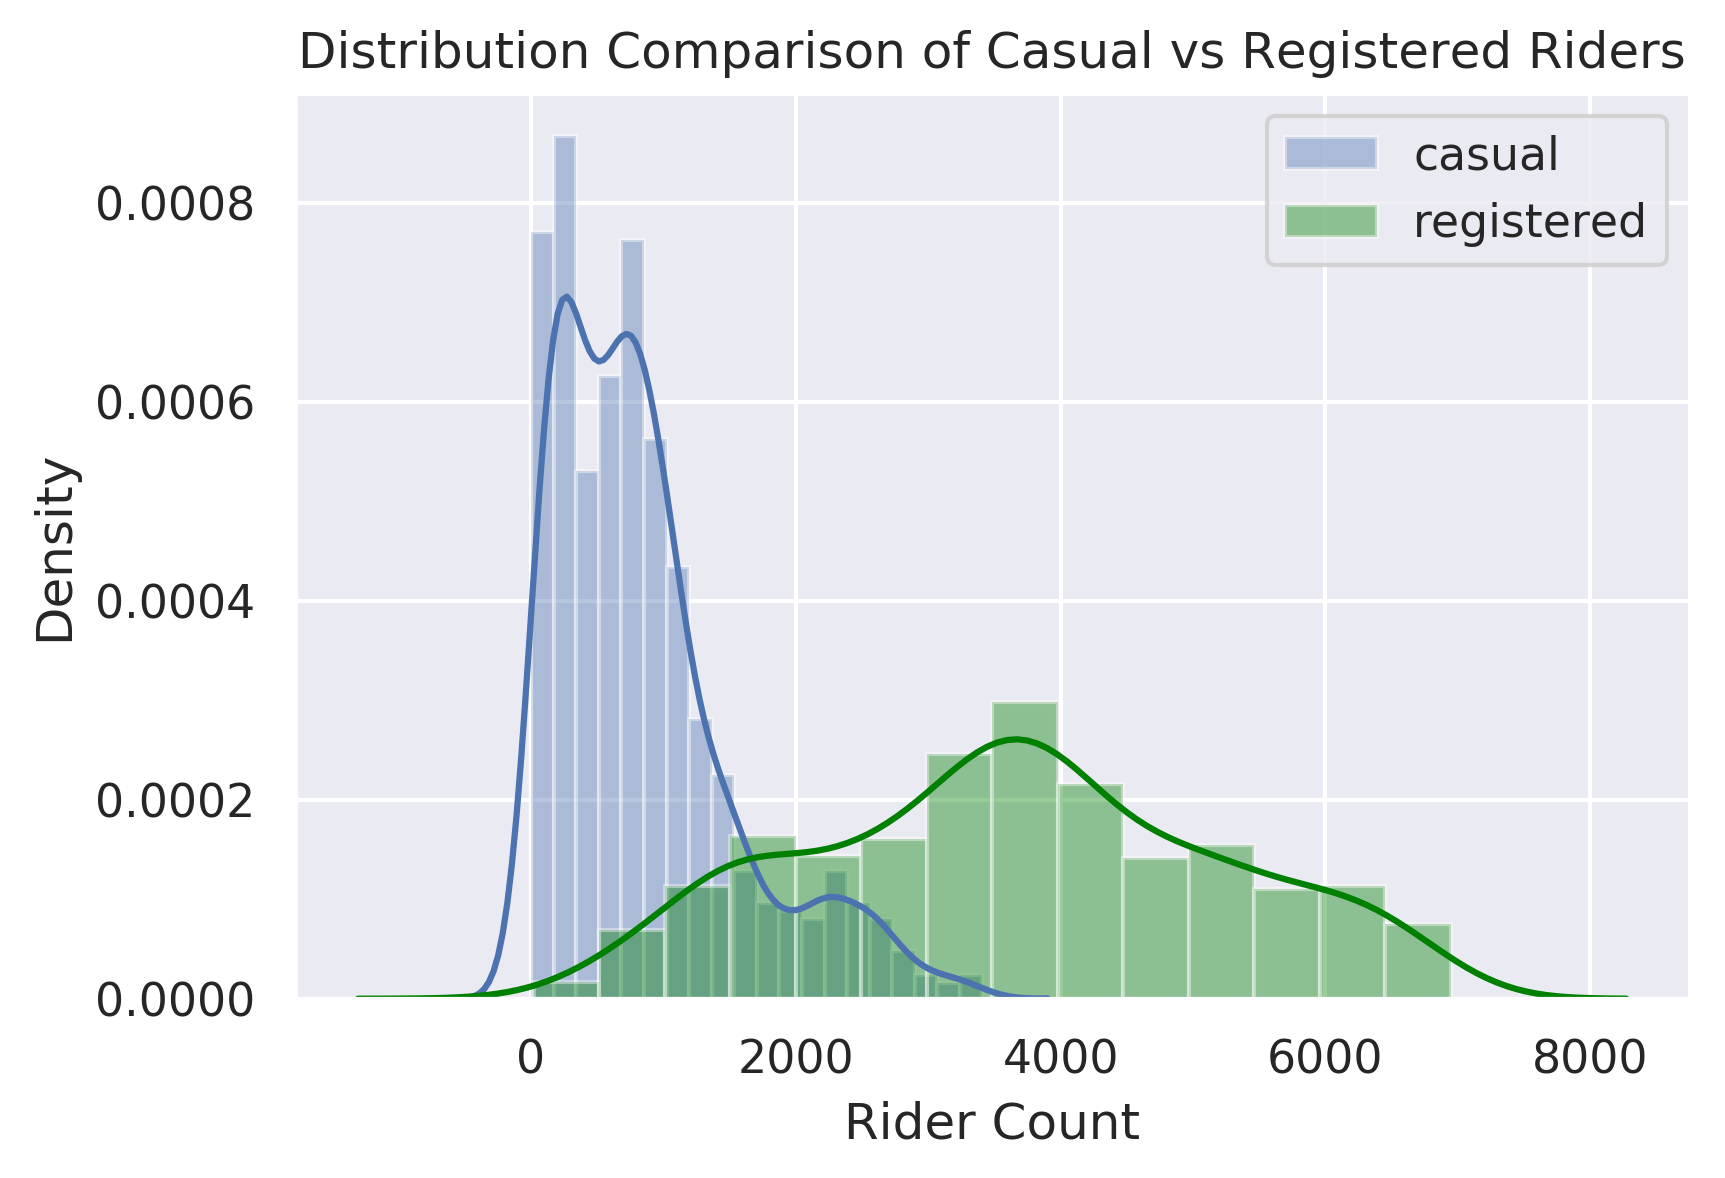

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Distribution')

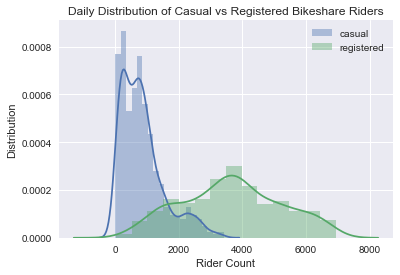

In [4]:
sns.distplot(daily_counts['casual'], label='casual')
sns.distplot(daily_counts['registered'], label='registered')
plt.legend()
plt.title('Daily Distribution of Casual vs Registered Bikeshare Riders')
plt.xlabel('Rider Count')
plt.ylabel('Distribution')

### Question 3b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

**The distribution of registered users is symmetrical with one mode a little under 4000 and longer tails than a normal distribution; there's quite a bit of variance in the day-to-day number of registered riders using the bikes. The distribution of casual riders is far from symmetrical; it is right-skewed with the highest density in the area of 0-1000 riders. You could maybe argue that there is another mode a little to the right of 2000. Maybe this is the rider count on holidays or events (i.e., times when lots of people want to go somewhere)? But for the most part, the casual distribution is much less spread out than the registered distribution.**

## 3. Ethical Considerations

City planners, transportation agencies, and policy makers have started to collaborate with bike sharing companies in order to reduce congestion and transportation costs. Recently city planners and policy makers have also been trying to make transportation more equitable. 

Equity in transportation includes: finding ways to make transportation more accessible to people in all neighborhoods within a given region, making the costs of transportation affordable to people across all income levels, and assessing how inclusive transportation systems are over time. Data about city residents may shed light on how to better assess transportation cost and equity impacts on transportation users. Bearing this in mind, answer the following two questions on the nature of the data, their possible shortcomings, and ethical considerations associated with how we as data scientists use, manipulate, and share this data.  

### Question 3a

In addition to the type of rider (casual vs. registered) and the overall count of each, what other kinds of demographic data would be useful (e.g. identity, neighborhood, monetary expenses, etc.)? 

**Neighborhood, income, owernship of other vehicles (e.g., car), useage of public transit.**

### Question 3b

What is an example of a privacy or consent issue that could occur when accessing the demographic data you brought up in the previous question?

**Most people wouldn't want to share their income.**

### Question 4

The plot above doesn't show us how the counts for registered and casual riders vary together. Let's make a scatter plot to investigate the relationship between casual and registered counts -- and this time, do it **by hour**.

#### Question 4a

Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make the scatter plot.

* Use the `hourly_counts` DataFrame to plot hourly counts instead of daily counts.
* The plot should include linear regression lines and confidence intervals.
* The points in the scatterplot should be colored according to whether or not the day is a workday.
* There are many points in the scatter plot so make them small to help reduce overplotting.
* The plot should include a title.
* The axes should be labeled meaningfully.
* You can set the `height` parameter if you want to adjust the size of the `lmplot`.

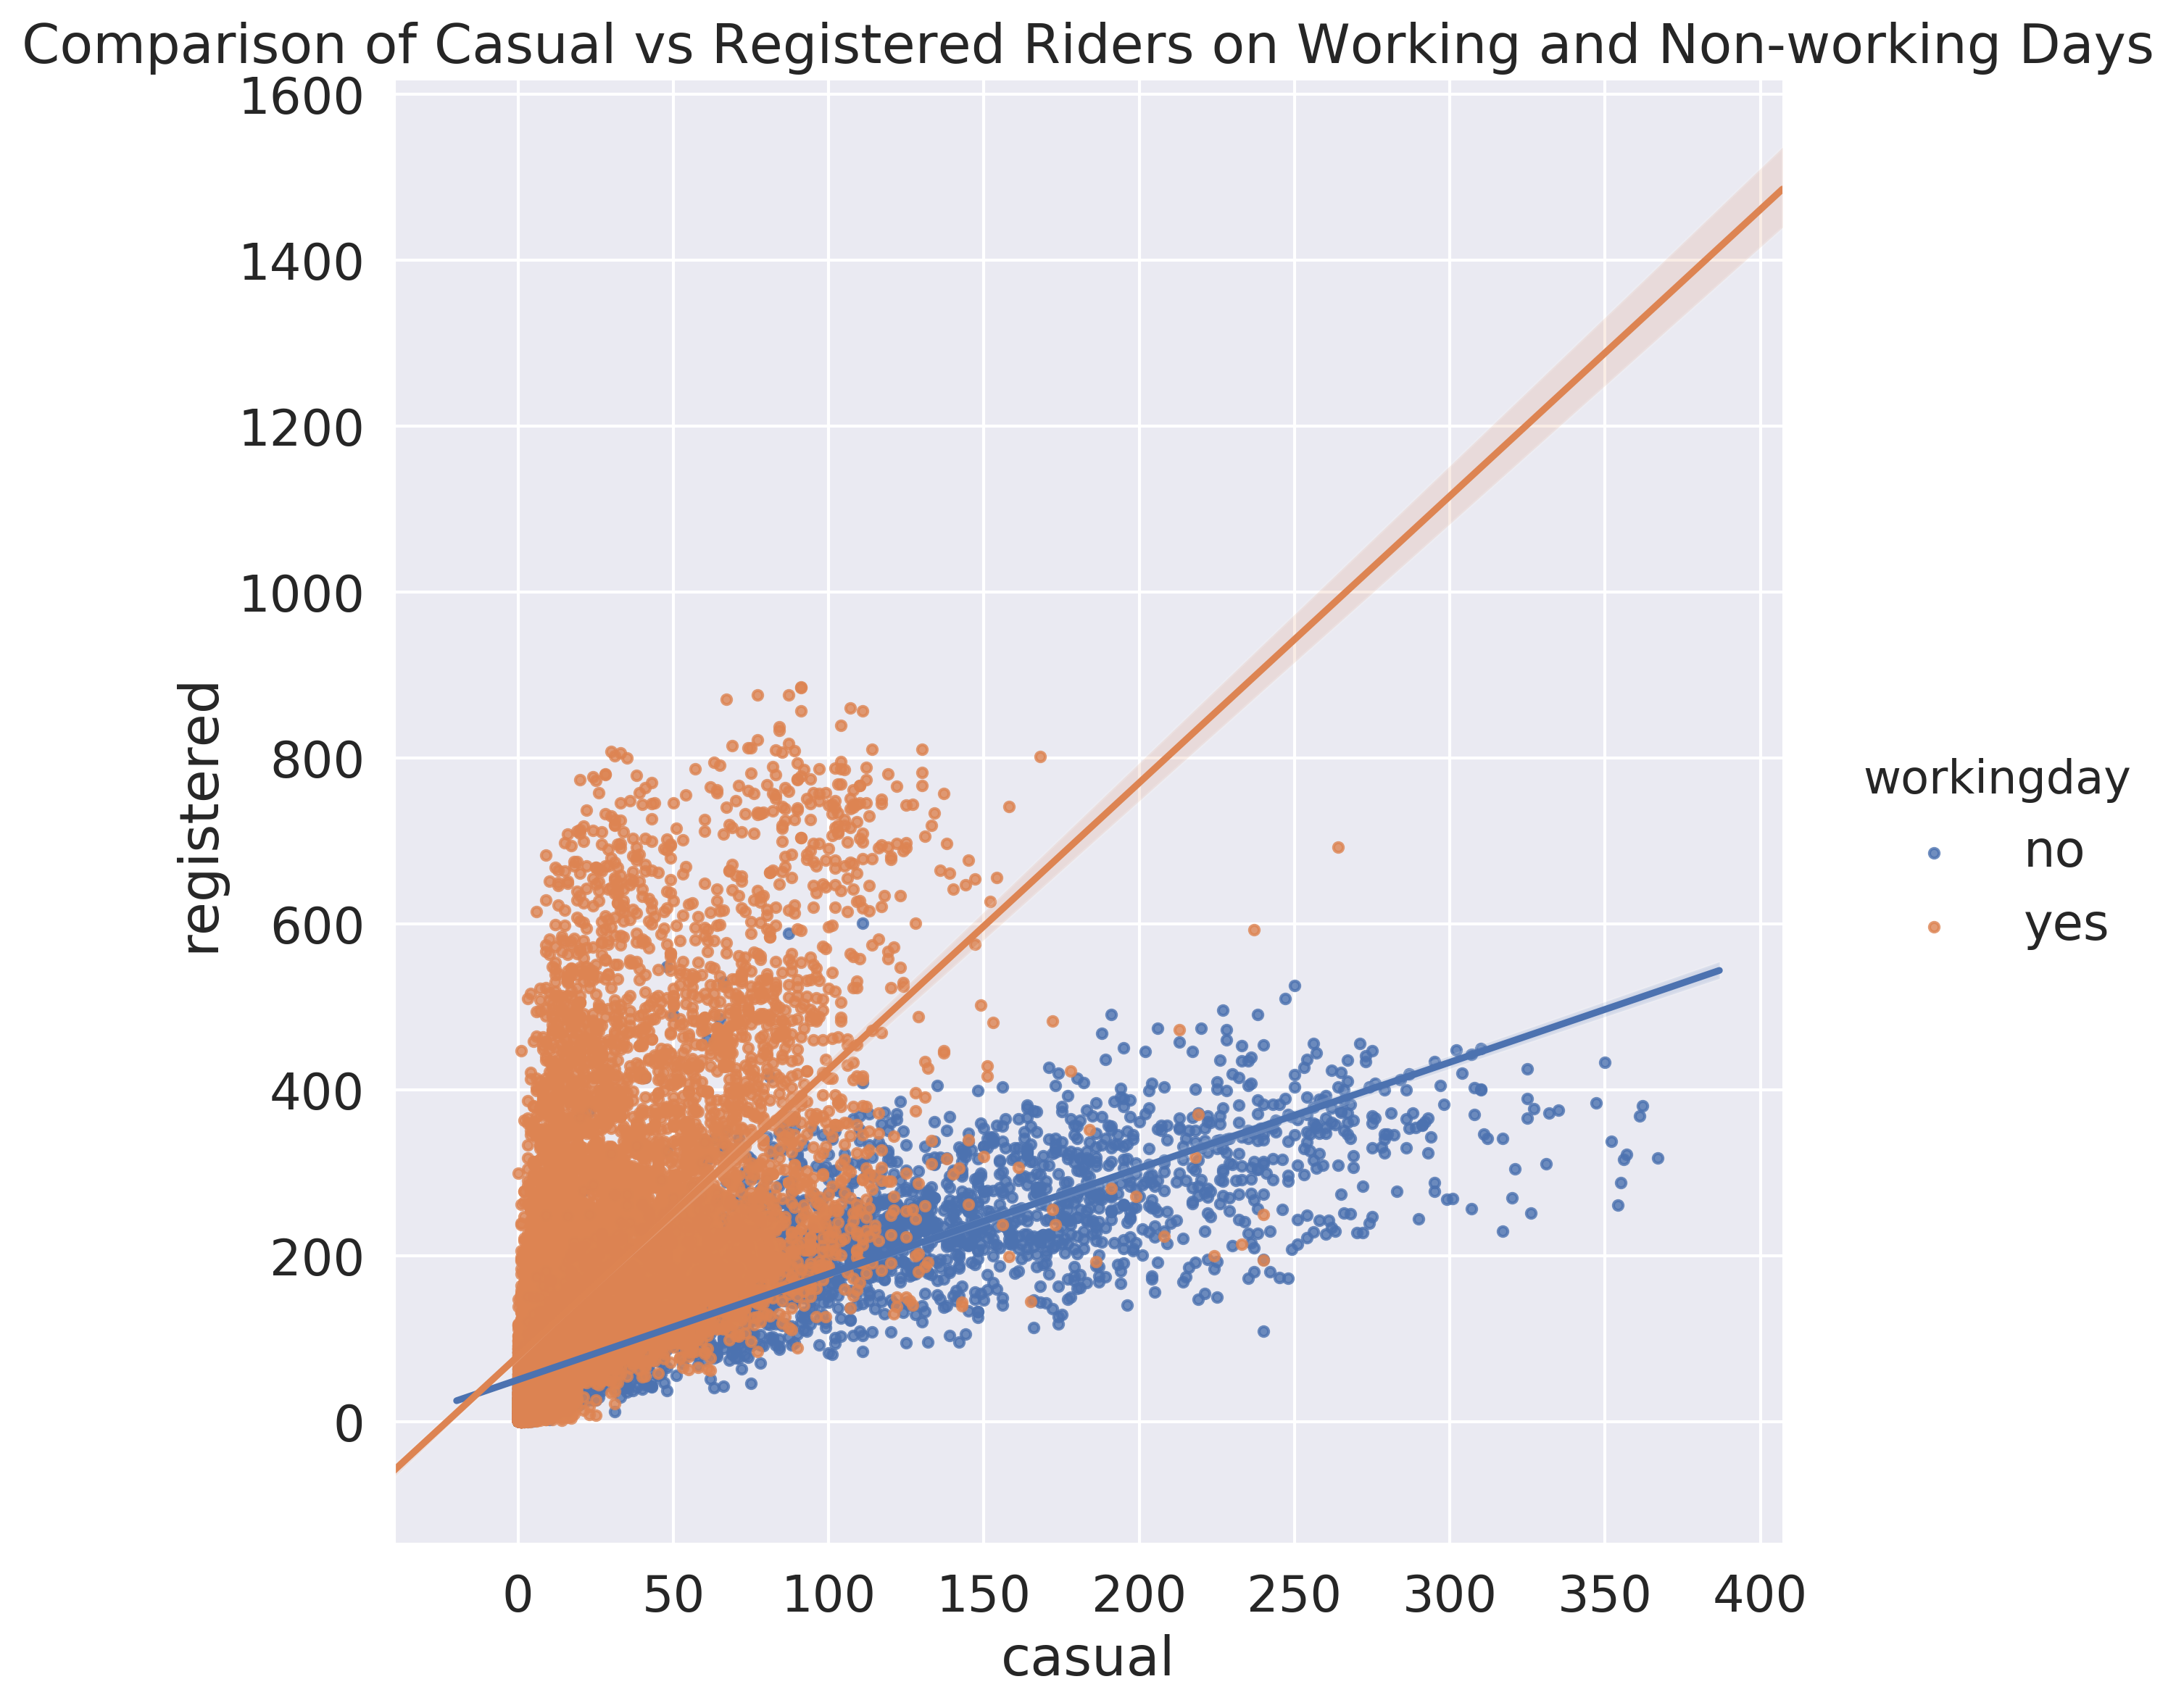

**Hints:** 
* Check out this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).
* You will need to set `x`, `y`, and `hue` and the `scatter_kws`.
* You will also need `plt.title`, `plt.xlabel`, and `plt.ylabel`. Properly labeling the legend will require using `plt.legend` yourself instead of letting `sns.lmplot` call it for you.

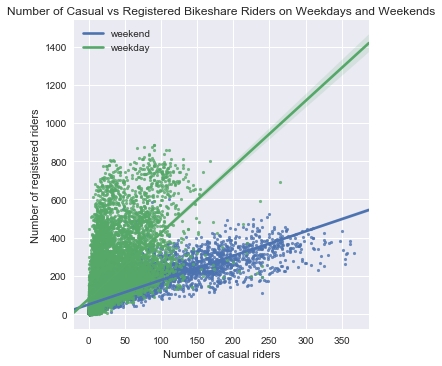

In [5]:
sns.lmplot(x='casual', y='registered', data=hourly_counts, hue='workingday', scatter_kws={'s': 10}, legend=False)
plt.xlabel('Number of casual riders')
plt.ylabel('Number of registered riders')
plt.title('Number of Casual vs Registered Bikeshare Riders on Weekdays and Weekends')
plt.legend(labels=['weekend', 'weekday'])

### Question 4b

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does [overplotting](http://www.textbook.ds100.org/ch/06/viz_principles_2.html) have on your ability to describe this relationship?

**It seems like casual riders primarily ride on weekends. Registered riders ride primarily on weekdays (probably for commuting). However, it is a bit difficult to tell because of the overplotting in the lower left corner - we can't see how many datapoints there are where there are few casual riders and few registered riders on weekends because those dots are covered up by the weekday dots.**

### Question 5 (Bonus)

The following command shows the number of rides by registered users during each month. Suppose we want to change this plot so that it compares casual vs registered, i.e., it shows both the number of registered rides each month and the number of casual rides during that same month. Unfortunately, the way the data is structured makes it difficult to use Seaborn functions to do that. **What about the structure of the data would need to change so that you could make a graph like the following using a single call to `sns.barplot`**?

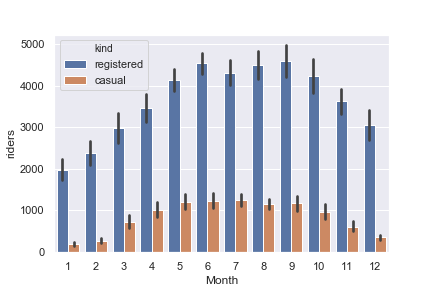

Do not try to write the code to do this. Instead, write out a few example rows of the DataFrame in the space provided.

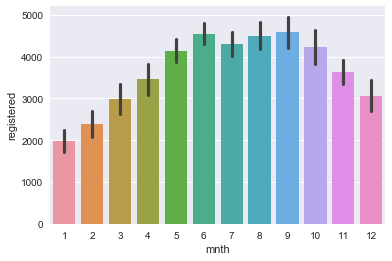

In [6]:
sns.barplot(x='mnth', y='registered', data=daily_counts)

A few rows from the desired DataFrame:

Column 1 | Column 2 | Column 3
-------- | -------- | ----------
Entry 1 | Entry 2 | Entry 3
Entry 4 | Entry 5 | Entry 6
... | ... | ...